# 모델 평가

분류의 평가 지표

정확도, 오차 행렬, 분류 리포트,
정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

## 정확도 (Accuracy)

- 실제 데이터에서 에측 데이터가 얼마나 같은지를 판단하는 지표

 > \begin{equation}
\text{정확도(Accuracy)} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
\end{equation}

- 직관적으로 모델 예측 성능을 나타내는 평가 지표

## 오차행렬 (Confusion Matrix)

- 학습된 분류 모델이 예측을 수행하면서 얼마나 혼란스러워(confused) 하고 있는지 함께 보여주는 지표
- 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표


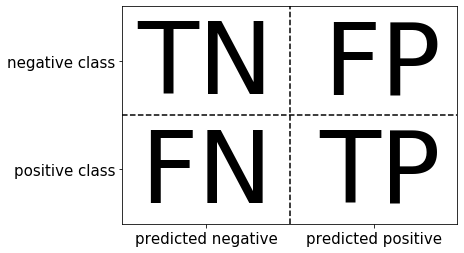

In [1]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

- True / False : 예측값과 실제값이 같은가 /틀린가
- Negative / Positive : 예측 결과 값이 부정(0) / 긍정(1)

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값은 역시 Negative 값 0
- FP : 예측값을 Positive 값 1로 예측 했는데 실제 값은 Negative 값 0
- FN : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

[confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
```
confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```
- y_true : 정답
- y_pred : 예측 결과

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()  # 손글씨 데이터
y = digits.target == 9  # 불균형 데이터셋 생성

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [3]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression


In [4]:
# 오차 행렬
from sklearn.metrics import confusion_matrix


- TN FP
- FN TP


In [5]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
# 오차 행렬


오차 행렬에서 정확도 재정의

> \begin{equation}
\text{Accuracy} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

## 정밀도(Precision)와 재현율(Recall)

 > \begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation} <br>
 > \begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

정밀도
 - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 거짓양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용
 - 양성 예측도(PPV) 라고도 함

재현율
 - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용
 - 거짓 음성(FN)을 피하는 것이 중요할 때
 - 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 함

- 정밀도가 상대적으로 더 중요한 지표인 경우
 - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 스팸 메일 판단 모델 : 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 메일을 아예 받지 못하게 됨

- 재현율이 상대적으로 더 중요한 지표인 경우
 - 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 암 판단 모델 : 실제 Positive인 암 환자를 Negative 음성으로 잘못 판단했을 경우 생명이 위험
 - 보험/금융 사기 적발 모델 : 실제 사기인 Positive 건을 Negative로 잘못 판단하면 회사에 손해가 큼

## F1 스코어

> \begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

- 정밀도와 재현율을 결합한 지표
- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 갖음

In [7]:
# f1_score
from sklearn.metrics import f1_score


## 분류 리포트

[classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

- 정밀도, 재현율, f1-스코어 모두를 한 번에 깔끔하게 출력

In [8]:
# 분류 리포트 DecisionTreeClassifier
from sklearn.metrics import classification_report


In [9]:
# 분류 리포트 LogisticRegression


- macro avg : 클래스별 점수의 평균을 계산
- weighted avg : 클래스의 샘플 수로 가중 평균

## ROC, AUC


ROC(Receiver Operating Characteristic) : 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용되는 도구
- ROC 곡선은 분류기의 모든 임계값을 고려하지만 정밀도와 재현율 대신에 거짓 양성 비율 (FPR)이 변할 때 진짜 양성 비율 (TPR)이 어떻게 변하는지를 나타내는 곡선

> \begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

- 진짜 양성비율 : 재현율
- 가짜 양성비율 : 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율

AUC(Area Under the Curve) : ROC 곡선 아래의 면적값



- [roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) : ROC 곡선을 그리는 메소드
- [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) : AUC 계산 메소드

In [10]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
from sklearn.datasets import make_blobs
from sklearn.svm import SVC


# SVC


In [11]:
# ROC 곡선 그리기
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np


# 0 근처의 임계값을 찾습니다


- ROC 곡선은 왼쪽 위에 가까울수록 이상적
- 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율이 높은 분류기가 좋은 것

In [12]:
# 랜덤 포레스트와 SVM의 ROC 곡선 비교
from sklearn.ensemble import RandomForestClassifier



## 모델평가 실습 01


In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

cancer.target_names #악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### confusion matrix

- 0,0 진짜 악성, 예측 악성
- 0,1 진짜 악성, 예측 양성
- 1,0 진짜 양성, 예측 악성
- 1,1 진짜 양성, 예측 양성

In [15]:
from sklearn import metrics


- 0(악성 종양)을 양성으로 볼 경우 윗 줄, 1(양성 종양)을 양성으로 볼 경우 아랫 줄

### ROC 곡선 그리기

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


### C값 조정

### ROC 곡선 비교

### scoring을 이용한 ROC 교차검증

- scoring은 성능검증에 사용할 함수이름

In [17]:
from sklearn.model_selection import cross_val_score


### ROC 곡선 비교

# 정리

1. 교차 검증을 해야 한다.
> 데이터를 분리해서 사용. 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복
 - 모델 학습에는 훈련 데이터
 - 모델과 매개변수 선택에는 검증 데이터
 - 모델 평가에는 테스트 데이터
 
 > 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용


2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.
> 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 함
 - 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없음
 - 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미침